In [1]:
import pandas as pd
import sqlite3
import sqlalchemy 
import os
import matplotlib.pyplot as plt

In [2]:

try:
    conn = sqlite3.connect("FVS_Outputs.db")    
except Exception as e:
    print(e)

#Now in order to read in pandas dataframe we need to know table name
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")


cases = pd.read_sql_query('SELECT * FROM FVS_Cases', conn)
carbon = pd.read_sql_query('SELECT * FROM FVS_Carbon', conn)
fuels = pd.read_sql_query('SELECT * FROM FVS_Fuels', conn)
summary = pd.read_sql_query('SELECT * FROM FVS_Summary2_East', conn)
FVS_Hrv_Carbon = pd.read_sql_query('SELECT * FROM FVS_Hrv_Carbon', conn)

conn.close()

Table Name : [('FVS_Cases',), ('FVS_Fuels',), ('FVS_Carbon',), ('FVS_Hrv_Carbon',), ('FVS_Summary2_East',)]


In [3]:
carbon.head()

,CaseID,StandID,Year,Aboveground_Total_Live,Aboveground_Merch_Live,Belowground_Live,Belowground_Dead,Standing_Dead,Forest_Down_Dead_Wood,Forest_Floor,Forest_Shrub_Herb,Total_Stand_Carbon,Total_Removed_Carbon,Carbon_Released_From_Fire
0,c9cb4c27-aece-4a5c-9f33-45716d0f8a85,Base_Acacia,2022,0.0,0.0,0.0,0.0,0.0,2.595000,3.770300,0.56,6.925300,0.0,0.0
1,c9cb4c27-aece-4a5c-9f33-45716d0f8a85,Base_Acacia,2027,0.0,0.0,0.0,0.0,0.0,1.656134,2.218359,0.70,4.574492,0.0,0.0
2,c9cb4c27-aece-4a5c-9f33-45716d0f8a85,Base_Acacia,2032,0.0,0.0,0.0,0.0,0.0,1.043510,2.197265,0.94,4.180776,0.0,0.0
3,c9cb4c27-aece-4a5c-9f33-45716d0f8a85,Base_Acacia,2037,0.0,0.0,0.0,0.0,0.0,0.657744,2.181022,1.28,4.118767,0.0,0.0
4,c9cb4c27-aece-4a5c-9f33-45716d0f8a85,Base_Acacia,2042,0.0,0.0,0.0,0.0,0.0,0.416285,2.162858,1.28,3.859143,0.0,0.0


Base_Acacia


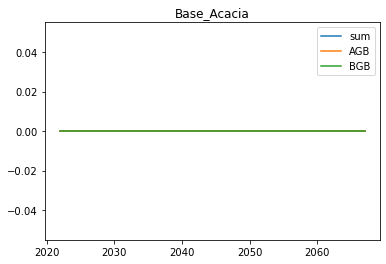

Base_BK


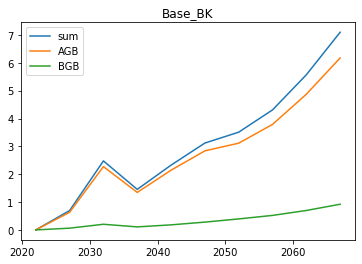

Base_BK-WN


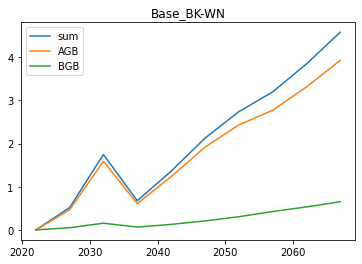

Base_C


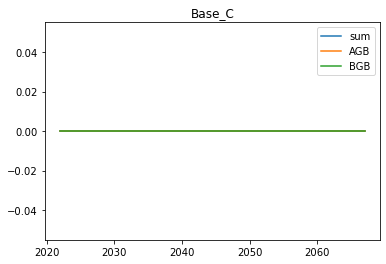

Base_LP


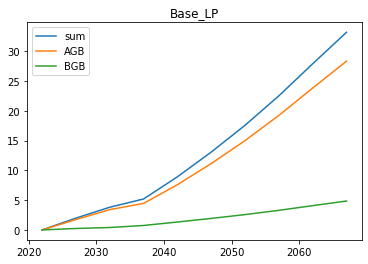

Base_RO


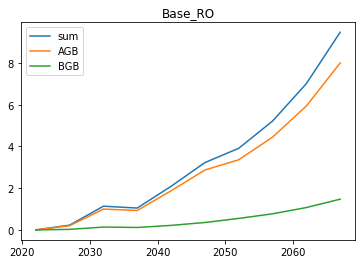

Base_WN


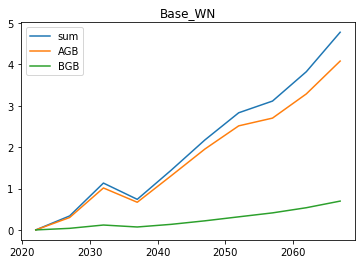

HD_Acacia


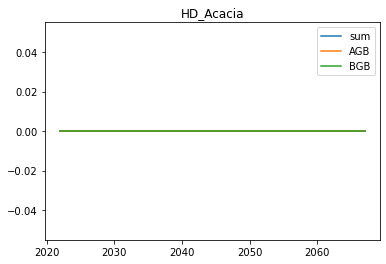

HD_BK


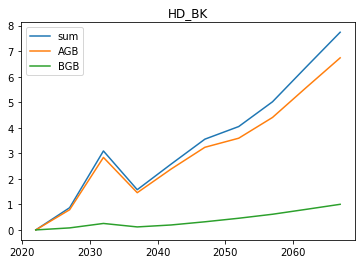

HD_BK-WN


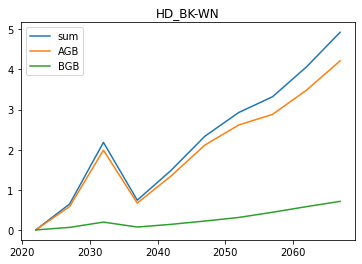

HD_C


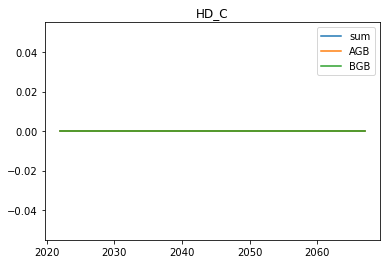

HD_LP


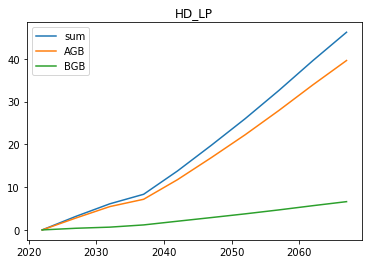

HD_RO


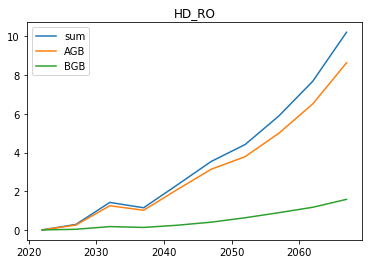

HD_WN


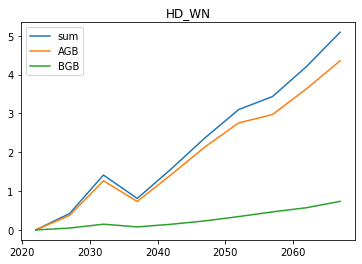

HI_VAR1


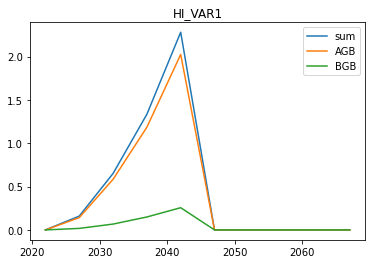

HI_VAR2


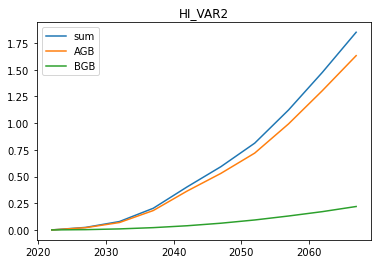

HI_VAR3


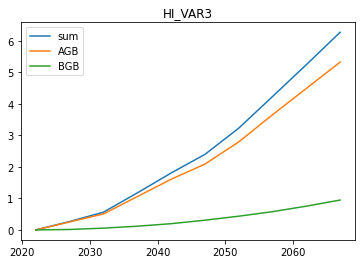

LD_Acacia


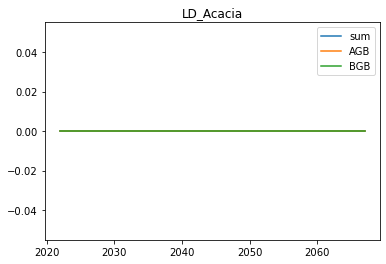

LD_BK


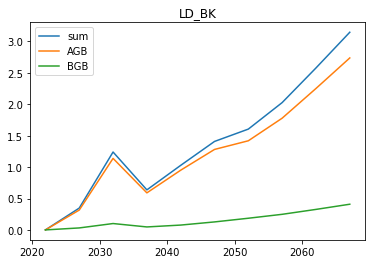

LD_BK-WN


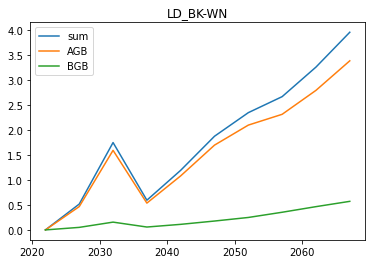

LD_C


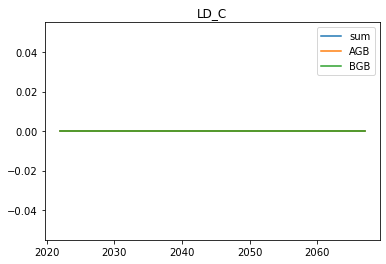

LD_LP


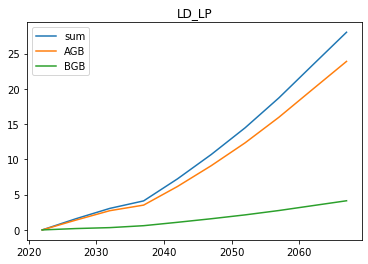

LD_RO


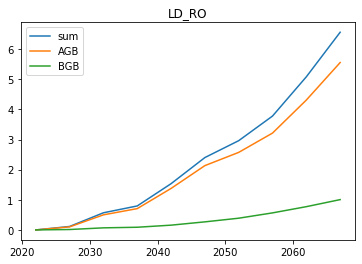

LD_WN


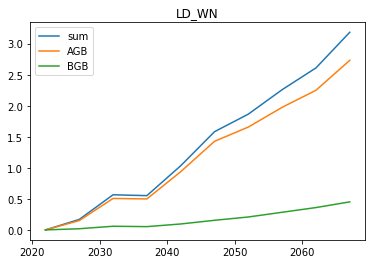

In [4]:
for case in carbon['StandID'].unique():
    tdf = carbon[carbon['StandID'] == case]
    csum = tdf['Aboveground_Total_Live'] + tdf['Belowground_Live'] 
    plt.plot(tdf['Year'],csum, label = 'sum')
    plt.plot(tdf['Year'],tdf['Aboveground_Total_Live'], label = 'AGB')
    plt.plot(tdf['Year'],tdf['Belowground_Live'], label = 'BGB')
    plt.title(case)
    plt.legend()
    print(tdf['StandID'].unique()[0])
    plt.show()